In [0]:
import logging
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.dbutils import DBUtils
import io

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

def read_and_concatenate_csv(file_address1, file_address2):
    try:
        # Use dbutils to read the first CSV file
        logger.info(f"Reading the first CSV file from {file_address1}")
        file1 = dbutils.fs.head(file_address1)
        df1 = pd.read_csv(io.StringIO(file1))
        logger.info("First CSV file read successfully")

        # Use dbutils to read the second CSV file
        logger.info(f"Reading the second CSV file from {file_address2}")
        file2 = dbutils.fs.head(file_address2)
        df2 = pd.read_csv(io.StringIO(file2))
        logger.info("Second CSV file read successfully")

        # Concatenate the two DataFrames
        logger.info("Concatenating the two DataFrames")
        concatenated_df = pd.concat([df1, df2], ignore_index=True)
        logger.info("DataFrames concatenated successfully")

        return concatenated_df

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        return None

# File addresses
file_address1 = 'dbfs:/FileStore/tables/yellow_tripdata_2019_01.csv'
file_address2 = 'dbfs:/FileStore/tables/yellow_tripdata_2019_02.csv'

# Call the function and get the concatenated DataFrame
result_df = read_and_concatenate_csv(file_address1, file_address2)

# If needed, display the concatenated DataFrame
#if result_df is not None:
   # display(result_df)

2024-06-05 08:25:34,451 - INFO - Reading the first CSV file from dbfs:/FileStore/tables/yellow_tripdata_2019_01.csv
2024-06-05 08:25:34,748 - INFO - First CSV file read successfully
2024-06-05 08:25:34,749 - INFO - Reading the second CSV file from dbfs:/FileStore/tables/yellow_tripdata_2019_02.csv


[Truncated to first 65536 bytes]


2024-06-05 08:25:35,040 - INFO - Second CSV file read successfully
2024-06-05 08:25:35,041 - INFO - Concatenating the two DataFrames
2024-06-05 08:25:35,045 - INFO - DataFrames concatenated successfully


[Truncated to first 65536 bytes]


In [0]:
result_df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1.0,N,151.0,239.0,1.0,7.0,0.5,0.5,1.65,0.00,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1.0,N,239.0,246.0,1.0,14.0,0.5,0.5,1.00,0.00,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1.0,N,236.0,236.0,1.0,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2.0,N,193.0,193.0,2.0,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.00,2.0,N,193.0,193.0,2.0,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1.0,N,163.0,229.0,1.0,6.5,0.5,0.5,1.25,0.00,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1.0,N,229.0,7.0,1.0,13.5,0.5,0.5,3.70,0.00,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1.0,N,141.0,234.0,1.0,10.0,0.5,0.5,1.70,0.00,0.3,13.00,NaN


In [0]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               1436 non-null   int64  
 1   tpep_pickup_datetime   1436 non-null   object 
 2   tpep_dropoff_datetime  1436 non-null   object 
 3   passenger_count        1436 non-null   int64  
 4   trip_distance          1436 non-null   float64
 5   RatecodeID             1435 non-null   float64
 6   store_and_fwd_flag     1434 non-null   object 
 7   PULocationID           1434 non-null   float64
 8   DOLocationID           1434 non-null   float64
 9   payment_type           1434 non-null   float64
 10  fare_amount            1434 non-null   float64
 11  extra                  1434 non-null   float64
 12  mta_tax                1434 non-null   float64
 13  tip_amount             1434 non-null   float64
 14  tolls_amount           1434 non-null   float64
 15  impr

In [0]:

def calculate_missing_percentage(result_df):
    try:
        # Calculating missing values count for each column
        missing_count = result_df.isnull().sum()

        # Calculating total number of rows
        total_rows = result_df.shape[0]

        # Calculating percentage of missing data for each column
        missing_percentage = (missing_count / total_rows) * 100

        # Logging the results
        for col, percentage in missing_percentage.iteritems():
            logging.info(f"Column '{col}': {percentage:.2f}% missing")

        return missing_percentage
    
    except Exception as e:
        logging.exception("An error occurred while calculating missing percentage")
        raise

    # Setting up logging
    logging.basicConfig(level=logging.INFO)

    
# Calculating missing percentage
missing_percentage = calculate_missing_percentage(result_df)
print(missing_percentage)   


2024-06-05 08:25:35,384 - INFO - Column 'VendorID': 0.00% missing
2024-06-05 08:25:35,388 - INFO - Column 'tpep_pickup_datetime': 0.00% missing
2024-06-05 08:25:35,393 - INFO - Column 'tpep_dropoff_datetime': 0.00% missing
2024-06-05 08:25:35,398 - INFO - Column 'passenger_count': 0.00% missing
2024-06-05 08:25:35,399 - INFO - Column 'trip_distance': 0.00% missing
2024-06-05 08:25:35,406 - INFO - Column 'RatecodeID': 0.07% missing
2024-06-05 08:25:35,407 - INFO - Column 'store_and_fwd_flag': 0.14% missing
2024-06-05 08:25:35,415 - INFO - Column 'PULocationID': 0.14% missing
2024-06-05 08:25:35,416 - INFO - Column 'DOLocationID': 0.14% missing
2024-06-05 08:25:35,421 - INFO - Column 'payment_type': 0.14% missing
2024-06-05 08:25:35,423 - INFO - Column 'fare_amount': 0.14% missing
2024-06-05 08:25:35,429 - INFO - Column 'extra': 0.14% missing
2024-06-05 08:25:35,430 - INFO - Column 'mta_tax': 0.14% missing
2024-06-05 08:25:35,434 - INFO - Column 'tip_amount': 0.14% missing
2024-06-05 08:

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.069638
store_and_fwd_flag        0.139276
PULocationID              0.139276
DOLocationID              0.139276
payment_type              0.139276
fare_amount               0.139276
extra                     0.139276
mta_tax                   0.139276
tip_amount                0.139276
tolls_amount              0.139276
improvement_surcharge     0.139276
total_amount              0.139276
congestion_surcharge     50.348189
dtype: float64


In [0]:
# imputing the missing value
import numpy as np


def impute_congestion_surcharge(result_df):
    try:
        # Check if 'congestion_surcharge' column exists
        if 'congestion_surcharge' not in result_df.columns:
            logging.error("Column 'congestion_surcharge' not found in the DataFrame.")
            return result_df

        # Check if 'congestion_surcharge' column is of type float64
        if result_df['congestion_surcharge'].dtype != 'float64':
            logging.error("Column 'congestion_surcharge' is not of type float64.")
            return result_df

        # Impute missing values with the median
        median_value = result_df['congestion_surcharge'].median()
        result_df['congestion_surcharge'].fillna(median_value, inplace=True)

        logging.info("Congestion surcharge column imputed successfully.")
        
        return result_df
    
    except Exception as e:
        logging.exception("An error occurred while imputing congestion surcharge.")
        raise

    # Setting up logging
    logging.basicConfig(level=logging.INFO)

  
    
result_df = impute_congestion_surcharge(result_df)

2024-06-05 08:25:35,561 - INFO - Congestion surcharge column imputed successfully.


In [0]:

def calculate_missing_percentage(result_df):
    try:
        # Calculating missing values count for each column
        missing_count = result_df.isnull().sum()

        # Calculating total number of rows
        total_rows = result_df.shape[0]

        # Calculating percentage of missing data for each column
        missing_percentage = (missing_count / total_rows) * 100

        # Logging the results
        for col, percentage in missing_percentage.iteritems():
            logging.info(f"Column '{col}': {percentage:.2f}% missing")

        return missing_percentage
    
    except Exception as e:
        logging.exception("An error occurred while calculating missing percentage")
        raise

    # Setting up logging
    logging.basicConfig(level=logging.INFO)

    
# Calculating missing percentage
missing_percentage = calculate_missing_percentage(result_df)
print(missing_percentage)   


2024-06-05 08:25:35,664 - INFO - Column 'VendorID': 0.00% missing
2024-06-05 08:25:35,667 - INFO - Column 'tpep_pickup_datetime': 0.00% missing
2024-06-05 08:25:35,668 - INFO - Column 'tpep_dropoff_datetime': 0.00% missing
2024-06-05 08:25:35,670 - INFO - Column 'passenger_count': 0.00% missing
2024-06-05 08:25:35,672 - INFO - Column 'trip_distance': 0.00% missing
2024-06-05 08:25:35,674 - INFO - Column 'RatecodeID': 0.07% missing
2024-06-05 08:25:35,675 - INFO - Column 'store_and_fwd_flag': 0.14% missing
2024-06-05 08:25:35,677 - INFO - Column 'PULocationID': 0.14% missing
2024-06-05 08:25:35,680 - INFO - Column 'DOLocationID': 0.14% missing
2024-06-05 08:25:35,680 - INFO - Column 'payment_type': 0.14% missing
2024-06-05 08:25:35,682 - INFO - Column 'fare_amount': 0.14% missing
2024-06-05 08:25:35,683 - INFO - Column 'extra': 0.14% missing
2024-06-05 08:25:35,691 - INFO - Column 'mta_tax': 0.14% missing
2024-06-05 08:25:35,693 - INFO - Column 'tip_amount': 0.14% missing
2024-06-05 08:

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.069638
store_and_fwd_flag       0.139276
PULocationID             0.139276
DOLocationID             0.139276
payment_type             0.139276
fare_amount              0.139276
extra                    0.139276
mta_tax                  0.139276
tip_amount               0.139276
tolls_amount             0.139276
improvement_surcharge    0.139276
total_amount             0.139276
congestion_surcharge     0.000000
dtype: float64


2024-06-05 08:25:35,771 - INFO - Passenger count distribution per trip (sorted):
2024-06-05 08:25:35,772 - INFO - Passenger Count: 0, Frequency: 15
2024-06-05 08:25:35,773 - INFO - Passenger Count: 1, Frequency: 995
2024-06-05 08:25:35,774 - INFO - Passenger Count: 2, Frequency: 257
2024-06-05 08:25:35,775 - INFO - Passenger Count: 3, Frequency: 72
2024-06-05 08:25:35,777 - INFO - Passenger Count: 4, Frequency: 40
2024-06-05 08:25:35,783 - INFO - Passenger Count: 5, Frequency: 43
2024-06-05 08:25:35,784 - INFO - Passenger Count: 6, Frequency: 14


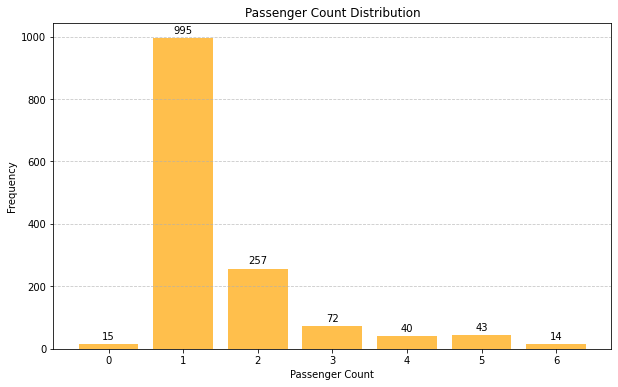

Out[59]: 0     15
1    995
2    257
3     72
4     40
5     43
6     14
Name: passenger_count, dtype: int64

In [0]:
# 1. What is the distribution of passenger counts per trip?

# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def passenger_count_distribution(result_df):
    try:
        # Check if required columns exist
        required_columns = ['passenger_count']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None

        # Calculate passenger count distribution
        passenger_count_dist = result_df['passenger_count'].value_counts().sort_index()

        # Logging the results
        logging.info("Passenger count distribution per trip (sorted):")
        for count, frequency in passenger_count_dist.items():
            logging.info(f"Passenger Count: {count}, Frequency: {frequency}")

        # Plotting the distribution
        plt.figure(figsize=(10, 6))
        bars = plt.bar(passenger_count_dist.index, passenger_count_dist.values, color='orange', alpha=0.7)
        plt.xlabel('Passenger Count')
        plt.ylabel('Frequency')
        plt.title('Passenger Count Distribution')
        plt.xticks(passenger_count_dist.index)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Annotate the bars with the frequency values
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{int(height)}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

        plt.show()
        return passenger_count_dist

    except Exception as e:
        logging.exception("An error occurred while calculating passenger count distribution.")
        raise
    

passenger_count_distribution(result_df)



2024-06-05 08:25:36,175 - INFO - Average trip distance by hour of the day:
2024-06-05 08:25:36,176 - INFO - Hour: 0, Average Trip Distance: 3.33
2024-06-05 08:25:36,179 - INFO - Hour: 1, Average Trip Distance: 3.67
2024-06-05 08:25:36,182 - INFO - Hour: 13, Average Trip Distance: 0.00
2024-06-05 08:25:36,183 - INFO - Hour: 15, Average Trip Distance: 0.00
2024-06-05 08:25:36,184 - INFO - Hour: 16, Average Trip Distance: 0.27
2024-06-05 08:25:36,185 - INFO - Hour: 17, Average Trip Distance: 22.59
2024-06-05 08:25:36,186 - INFO - Hour: 20, Average Trip Distance: 20.74
2024-06-05 08:25:36,188 - INFO - Hour: 22, Average Trip Distance: 1.23
2024-06-05 08:25:36,189 - INFO - Hour: 23, Average Trip Distance: 3.29


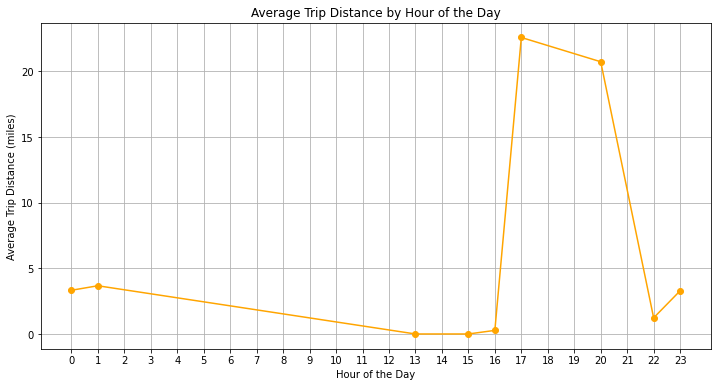

In [0]:

# 2. How does the trip distance vary across different times of the day?
# Configure logging
logging.basicConfig(level=logging.INFO)

def trip_distance_variation_by_time_of_day(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['tpep_pickup_datetime', 'trip_distance']
        for col in required_columns:
            if col not in result_df.columns:
                raise ValueError(f"Column '{col}' not found in the DataFrame.")
        
        # Convert tpep_pickup_datetime to datetime if not already
        if not pd.api.types.is_datetime64_any_dtype(result_df['tpep_pickup_datetime']):
            result_df['tpep_pickup_datetime'] = pd.to_datetime(result_df['tpep_pickup_datetime'])
        
        # Extract the hour from the pickup datetime
        result_df['hour'] = result_df['tpep_pickup_datetime'].dt.hour
        
        # Group by hour and calculate the average trip distance
        trip_distance_by_hour = result_df.groupby('hour')['trip_distance'].mean()
        
        # Logging the results
        logging.info("Average trip distance by hour of the day:")
        for hour, avg_distance in trip_distance_by_hour.items():
            logging.info(f"Hour: {hour}, Average Trip Distance: {avg_distance:.2f}")
        
        # Plotting the results
        plt.figure(figsize=(12, 6))
        plt.plot(trip_distance_by_hour.index, trip_distance_by_hour.values, marker='o', linestyle='-', color='orange')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Average Trip Distance (miles)')
        plt.title('Average Trip Distance by Hour of the Day')
        plt.grid(True)
        plt.xticks(range(0, 24))
        plt.show()
        
    except Exception as e:
        logging.exception("An error occurred while analyzing trip distance variation by time of the day.")
        raise


trip_distance_variation_by_time_of_day(result_df)


In [0]:
# 3. Is there any correlation between trip distance and fare amount?
# Configure logging
logging.basicConfig(level=logging.INFO)

def calculate_correlation(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['trip_distance', 'fare_amount']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None

        # Calculate the correlation
        correlation = result_df['trip_distance'].corr(result_df['fare_amount'])

        # Log the result
        logging.info(f"Correlation between trip distance and fare amount: {correlation:.2f}")

        return correlation

    except Exception as e:
        logging.exception("An error occurred while calculating the correlation between trip distance and fare amount.")
        raise

correlation = calculate_correlation(result_df)
print(f"Correlation between trip distance and fare amount: {correlation:}")

2024-06-05 08:25:36,662 - INFO - Correlation between trip distance and fare amount: 0.92


Correlation between trip distance and fare amount: 0.91648096319558


2024-06-05 08:25:36,772 - INFO - Average trip duration during peak hours: 356.22 minutes
2024-06-05 08:25:36,773 - INFO - Average trip duration during off-peak hours: 15.64 minutes


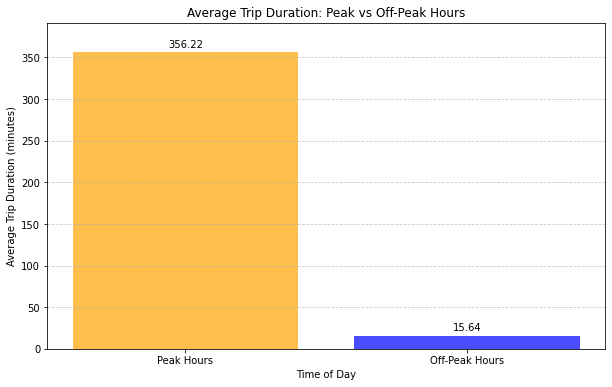

Out[62]: (356.2166666666667, 15.644669459962754)

In [0]:
# 4. What is the typical duration of trips during peak hours versus off-peak hours?
# Configure logging
logging.basicConfig(level=logging.INFO)

def trip_duration_peak_vs_off_peak(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None
        
        # Convert columns to datetime if they are not already
        for col in required_columns:
            if not pd.api.types.is_datetime64_any_dtype(result_df[col]):
                result_df[col] = pd.to_datetime(result_df[col])
        
        # Calculate trip duration in minutes
        result_df['trip_duration'] = (result_df['tpep_dropoff_datetime'] - result_df['tpep_pickup_datetime']).dt.total_seconds() / 60
        
        # Define peak hours (e.g., 7-9 AM and 4-6 PM)
        peak_hours = list(range(7, 10)) + list(range(16, 19))
        
        # Categorize trips as peak or off-peak
        result_df['is_peak'] = result_df['tpep_pickup_datetime'].dt.hour.isin(peak_hours)
        
        # Calculate average trip duration for peak and off-peak hours
        peak_avg_duration = result_df[result_df['is_peak']]['trip_duration'].mean()
        off_peak_avg_duration = result_df[~result_df['is_peak']]['trip_duration'].mean()
        
        # Log the results
        logging.info(f"Average trip duration during peak hours: {peak_avg_duration:.2f} minutes")
        logging.info(f"Average trip duration during off-peak hours: {off_peak_avg_duration:.2f} minutes")
        
        # Plotting the results
        labels = ['Peak Hours', 'Off-Peak Hours']
        durations = [peak_avg_duration, off_peak_avg_duration]

        plt.figure(figsize=(10, 6))
        plt.bar(labels, durations, color=['orange', 'blue'], alpha=0.7)
        plt.xlabel('Time of Day')
        plt.ylabel('Average Trip Duration (minutes)')
        plt.title('Average Trip Duration: Peak vs Off-Peak Hours')
        plt.ylim(0, max(durations) * 1.1)  # Adding some padding to the y-axis
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Annotate the bars with the average duration values
        for i, duration in enumerate(durations):
            plt.annotate(f'{duration:.2f}',
                         xy=(i, duration),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

        plt.show()
        
        return peak_avg_duration, off_peak_avg_duration
    
    except Exception as e:
        logging.exception("An error occurred while calculating trip durations for peak and off-peak hours.")
        raise

trip_duration_peak_vs_off_peak(result_df)


2024-06-05 08:25:37,083 - INFO - Average tip amount for each payment type:
2024-06-05 08:25:37,086 - INFO - Payment Type: 1.0, Average Tip Amount: 3.04
2024-06-05 08:25:37,089 - INFO - Payment Type: 2.0, Average Tip Amount: 0.00
2024-06-05 08:25:37,093 - INFO - Payment Type: 3.0, Average Tip Amount: 0.00
2024-06-05 08:25:37,095 - INFO - Payment Type: 4.0, Average Tip Amount: 0.00


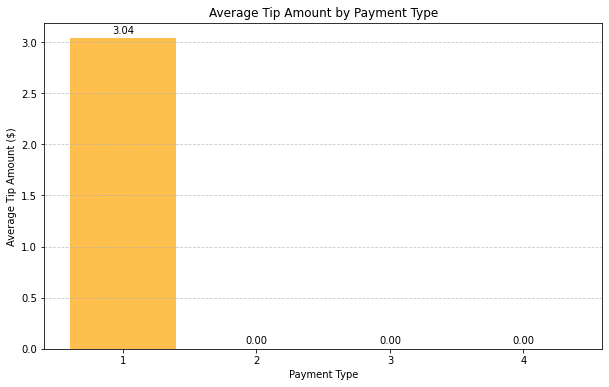

,payment_type,tip_amount
0,1.0,3.037505
1,2.0,0.000000
2,3.0,0.000000
3,4.0,0.000000


In [0]:
# 5. Can you identify any patterns in the relationship between payment type and tip amount?
# Configure logging
logging.basicConfig(level=logging.INFO)

def analyze_payment_type_tips(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['payment_type', 'tip_amount']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None
        
        # Calculate average tip amount for each payment type
        payment_tip_analysis = result_df.groupby('payment_type')['tip_amount'].mean().reset_index()
        
        # Log the results
        logging.info("Average tip amount for each payment type:")
        for index, row in payment_tip_analysis.iterrows():
            logging.info(f"Payment Type: {row['payment_type']}, Average Tip Amount: {row['tip_amount']:.2f}")
        
        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.bar(payment_tip_analysis['payment_type'], payment_tip_analysis['tip_amount'], color='orange', alpha=0.7)
        plt.xlabel('Payment Type')
        plt.ylabel('Average Tip Amount ($)')
        plt.title('Average Tip Amount by Payment Type')
        plt.xticks(payment_tip_analysis['payment_type'], rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Annotate the bars with the average tip values
        for index, row in payment_tip_analysis.iterrows():
            plt.annotate(f'{row["tip_amount"]:.2f}',
                         xy=(row['payment_type'], row['tip_amount']),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

        plt.show()
        
        return payment_tip_analysis
    
    except Exception as e:
        logging.exception("An error occurred while analyzing the relationship between payment type and tip amount.")
        raise
analyze_payment_type_tips(result_df)



In [0]:
# 6. Is there a significant difference in fares between trips with and without tolls?
from scipy import stats

# Configure logging
logging.basicConfig(level=logging.INFO)

def compare_fares_with_tolls(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['fare_amount', 'tolls_amount']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None
        
        # Calculate average fare amount for trips with and without tolls
        fare_with_tolls = result_df[result_df['tolls_amount'] > 0]['fare_amount']
        fare_without_tolls = result_df[result_df['tolls_amount'] == 0]['fare_amount']
        
        # Perform t-test to determine significance
        _, p_value = stats.ttest_ind(fare_with_tolls, fare_without_tolls, equal_var=False)
        
        # Log the results
        logging.info(f"P-value from t-test: {p_value:.4f}")
        
        
       
        
        return p_value
        
    
    except Exception as e:
        logging.exception("An error occurred while comparing fares with and without tolls.")
        raise

p_value = compare_fares_with_tolls(result_df)
print(f"P-value from t-test: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in fares between trips with and without tolls.")
else:
    print("There is no significant difference in fares between trips with and without tolls.")

2024-06-05 08:25:37,735 - INFO - P-value from t-test: 0.0000


P-value from t-test: 0.0000
There is a significant difference in fares between trips with and without tolls.


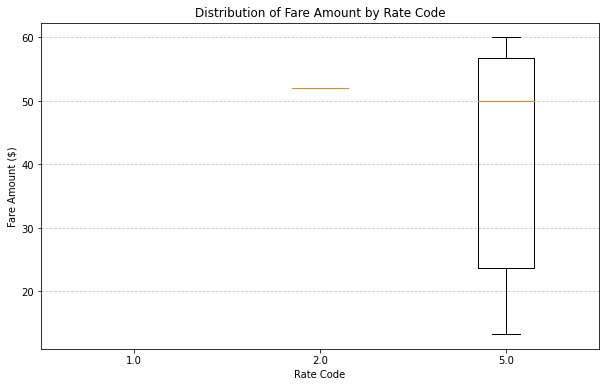

Out[65]: {1.0: array([ 7. , 14. ,  4.5, ..., 19.5,  6.5,  nan]),
 2.0: array([52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
        52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
        52., 52., 52., 52.]),
 5.0: array([15. , 50. , 60. , 13.3, 59. , 50. ])}

In [0]:
# 7. How do the fare amounts differ between different rate codes?
# Configure logging
logging.basicConfig(level=logging.INFO)

def analyze_fare_amount_by_rate_code(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['fare_amount', 'RatecodeID']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None
        
        # Create a dictionary to store fare amounts for each rate code
        fare_by_rate_code = {}

        # Group fare amounts by rate code
        for rate_code, group in result_df.groupby('RatecodeID'):
            fare_by_rate_code[rate_code] = group['fare_amount'].values
        
        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.boxplot(fare_by_rate_code.values(), labels=fare_by_rate_code.keys())
        plt.xlabel('Rate Code')
        plt.ylabel('Fare Amount ($)')
        plt.title('Distribution of Fare Amount by Rate Code')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.show()
        
        return fare_by_rate_code
    
    except Exception as e:
        logging.exception("An error occurred while analyzing fare amounts by rate code.")
        raise

analyze_fare_amount_by_rate_code(result_df)


2024-06-05 08:25:38,173 - INFO - Top 10 most common pickup locations:
2024-06-05 08:25:38,174 - INFO - 79.0     65
161.0    58
48.0     55
107.0    53
132.0    49
170.0    47
239.0    45
238.0    44
164.0    42
142.0    40
Name: PULocationID, dtype: int64
2024-06-05 08:25:38,177 - INFO - Top 10 most common drop-off locations:
2024-06-05 08:25:38,180 - INFO - 170.0    45
263.0    43
79.0     41
238.0    38
239.0    37
229.0    37
107.0    37
264.0    36
48.0     35
141.0    35
Name: DOLocationID, dtype: int64


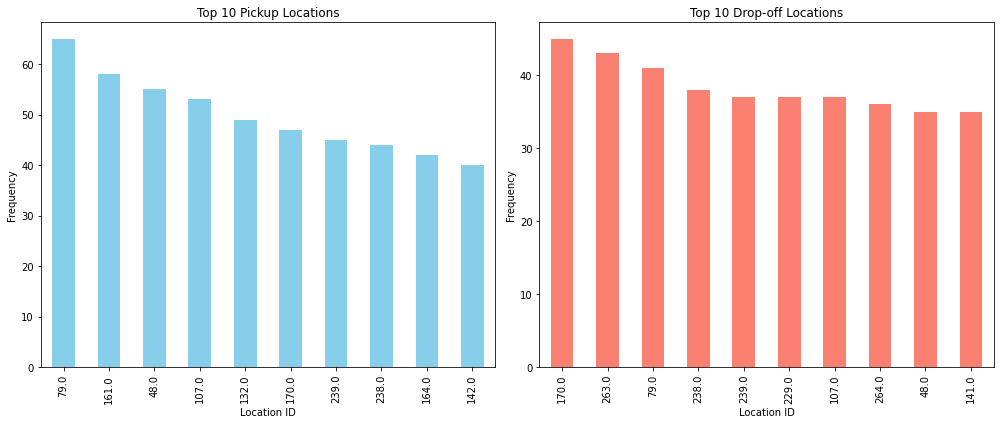

Out[66]: (79.0     65
 161.0    58
 48.0     55
 107.0    53
 132.0    49
 170.0    47
 239.0    45
 238.0    44
 164.0    42
 142.0    40
 Name: PULocationID, dtype: int64,
 170.0    45
 263.0    43
 79.0     41
 238.0    38
 239.0    37
 229.0    37
 107.0    37
 264.0    36
 48.0     35
 141.0    35
 Name: DOLocationID, dtype: int64)

In [0]:
# 8. What are the most common pickup and drop-off locations?
# Configure logging
logging.basicConfig(level=logging.INFO)

def find_common_locations(result_df):
    try:
        # Ensure the required columns exist
        required_columns = ['PULocationID', 'DOLocationID']
        for col in required_columns:
            if col not in result_df.columns:
                logging.error(f"Column '{col}' not found in the DataFrame.")
                return None
        
        # Count occurrences of pickup and drop-off locations
        pickup_counts = result_df['PULocationID'].value_counts()
        dropoff_counts = result_df['DOLocationID'].value_counts()
        
        # Get the top 10 most common pickup and drop-off locations
        top_pickup_locations = pickup_counts.head(10)
        top_dropoff_locations = dropoff_counts.head(10)
        
        # Log the results
        logging.info("Top 10 most common pickup locations:")
        logging.info(top_pickup_locations)
        logging.info("Top 10 most common drop-off locations:")
        logging.info(top_dropoff_locations)
        
        # Plotting the results
        plt.figure(figsize=(14, 6))
        
        # Subplot for pickup locations
        plt.subplot(1, 2, 1)
        top_pickup_locations.plot(kind='bar', color='skyblue')
        plt.title('Top 10 Pickup Locations')
        plt.xlabel('Location ID')
        plt.ylabel('Frequency')
        
        # Subplot for drop-off locations
        plt.subplot(1, 2, 2)
        top_dropoff_locations.plot(kind='bar', color='salmon')
        plt.title('Top 10 Drop-off Locations')
        plt.xlabel('Location ID')
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
        
        return top_pickup_locations, top_dropoff_locations
    
    except Exception as e:
        logging.exception("An error occurred while finding common pickup and drop-off locations.")
        raise
    
find_common_locations(result_df)


2024-06-05 08:25:38,791 - INFO - Number of outliers detected: 110


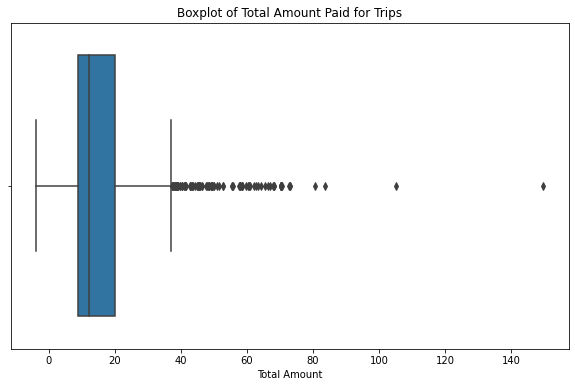

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,trip_duration,is_peak
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2.0,N,193.0,193.0,2.0,...,0.0,0.5,0.00,0.00,0.3,55.55,0.0,15,1.600000,False
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.00,2.0,N,193.0,193.0,2.0,...,0.0,0.5,0.00,0.00,0.3,55.55,0.0,16,4.100000,True
12,1,2019-01-01 00:45:21,2019-01-01 01:31:05,1,8.70,1.0,N,163.0,25.0,1.0,...,0.5,0.5,7.15,0.00,0.3,42.95,0.0,0,45.733333,False
23,1,2019-01-01 00:19:55,2019-01-01 00:57:56,1,12.30,1.0,N,138.0,50.0,1.0,...,0.5,0.5,4.00,5.76,0.3,49.06,0.0,0,38.016667,False
32,2,2019-01-01 00:43:28,2019-01-01 00:49:42,1,1.03,2.0,N,238.0,239.0,2.0,...,0.0,0.5,0.00,0.00,0.3,52.80,0.0,0,6.233333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,2,2019-02-01 00:12:37,2019-02-01 00:49:03,1,11.68,1.0,N,230.0,92.0,1.0,...,0.5,0.5,0.00,0.00,0.3,38.80,0.0,0,36.433333,False
1383,2,2019-02-01 00:04:39,2019-02-01 00:51:16,2,17.48,1.0,N,186.0,216.0,1.0,...,0.5,0.5,11.16,0.00,0.3,66.96,0.0,0,46.616667,False
1396,2,2019-02-01 00:02:15,2019-02-01 00:37:36,1,18.72,1.0,N,107.0,150.0,1.0,...,0.5,0.5,6.00,5.76,0.3,65.56,0.0,0,35.350000,False
1398,2,2019-02-01 00:56:33,2019-02-01 01:19:13,1,16.36,2.0,N,132.0,233.0,1.0,...,0.0,0.5,11.71,5.76,0.3,70.27,0.0,0,22.666667,False


In [0]:
# 9. Are there any outliers in the total amount paid for trips?
import seaborn as sns

# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def detect_outliers_iqr(result_df):
    try:
        # Ensure the 'total_amount' column exists
        if 'total_amount' not in result_df.columns:
            logging.error("The 'total_amount' column is not in the DataFrame")
            return None

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = result_df['total_amount'].quantile(0.25)
        Q3 = result_df['total_amount'].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = result_df[(result_df['total_amount'] < lower_bound) | (result_df['total_amount'] > upper_bound)]

        # Log the number of outliers detected
        logging.info(f"Number of outliers detected: {len(outliers)}")
        
        # Plot the boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=result_df['total_amount'])
        plt.title('Boxplot of Total Amount Paid for Trips')
        plt.xlabel('Total Amount')
        plt.show()
        
        return outliers
    except Exception as e:
        logging.error(f"Error in detecting outliers: {e}")
        return None

detect_outliers_iqr(result_df)



2024-06-05 08:25:39,087 - INFO - Data has been aggregated by month.


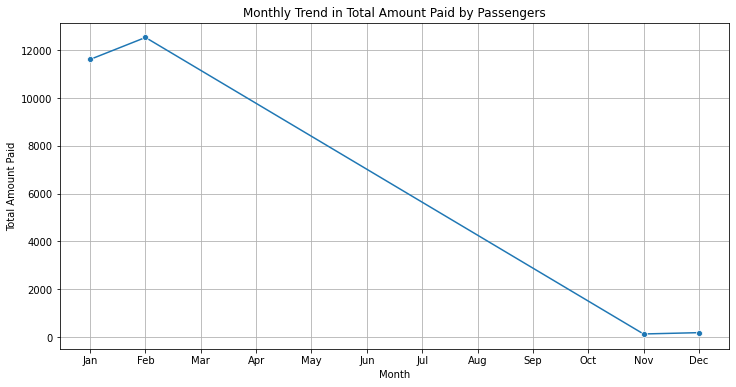

,month,total_amount
0,1,11611.59
1,2,12528.98
2,11,131.96
3,12,187.32


In [0]:
#10. Total amount paid by passengers by month ?
import seaborn as sns

# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def analyze_monthly_trend(result_df):
    try:
        # Ensure the necessary columns exist
        if 'tpep_pickup_datetime' not in result_df.columns or 'total_amount' not in result_df.columns:
            logging.error("Required columns are not in the DataFrame")
            return None

        # Convert pickup datetime to datetime format if it's not already
        result_df['tpep_pickup_datetime'] = pd.to_datetime(result_df['tpep_pickup_datetime'])

        # Extract month for seasonal analysis
        result_df['month'] = result_df['tpep_pickup_datetime'].dt.month

        # Aggregate total amount by month
        monthly_trend = result_df.groupby('month')['total_amount'].sum().reset_index()

        # Log the analysis steps
        logging.info("Data has been aggregated by month.")

        # Plot the monthly trend
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='month', y='total_amount', data=monthly_trend, marker='o')
        plt.title('Monthly Trend in Total Amount Paid by Passengers')
        plt.xlabel('Month')
        plt.ylabel('Total Amount Paid')
        plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.grid(True)
        plt.show()

        return monthly_trend
    except Exception as e:
        logging.error(f"Error in analyzing monthly trend: {e}")
        return None


analyze_monthly_trend(result_df)

2024-06-05 08:25:39,534 - INFO - Data has been aggregated by day of the week.


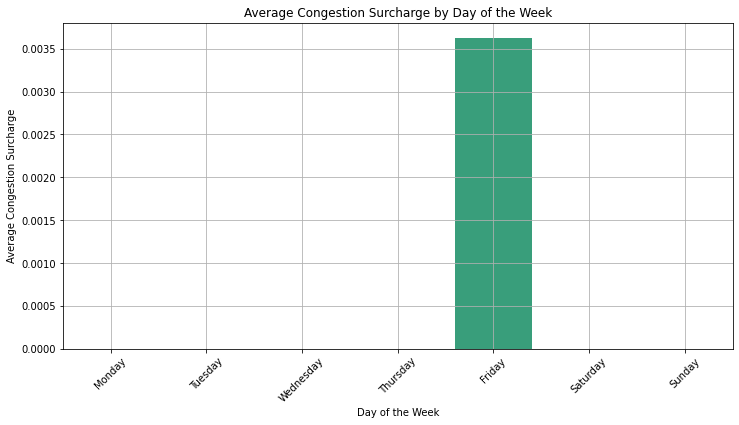

,day_of_week,congestion_surcharge
1,Monday,0.000000
3,Tuesday,0.000000
4,Wednesday,0.000000
2,Thursday,0.000000
0,Friday,0.003623


In [0]:

# 11. How does the congestion surcharge vary across different days of the week?
# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def analyze_congestion_surcharge_by_day(result_df):
    try:
        # Ensure the necessary columns exist
        if 'tpep_pickup_datetime' not in result_df.columns or 'congestion_surcharge' not in result_df.columns:
            logging.error("Required columns are not in the DataFrame")
            return None

        # Convert pickup datetime to datetime format if it's not already
        result_df['tpep_pickup_datetime'] = pd.to_datetime(result_df['tpep_pickup_datetime'])

        # Extract day of the week for analysis
        result_df['day_of_week'] = result_df['tpep_pickup_datetime'].dt.day_name()

        # Aggregate congestion surcharge by day of the week
        day_of_week_trend = result_df.groupby('day_of_week')['congestion_surcharge'].mean().reset_index()

        # Sort the days of the week to ensure proper order in the plot
        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_of_week_trend['day_of_week'] = pd.Categorical(day_of_week_trend['day_of_week'], categories=days_order, ordered=True)
        day_of_week_trend = day_of_week_trend.sort_values('day_of_week')

        # Log the analysis steps
        logging.info("Data has been aggregated by day of the week.")
        import seaborn as sns
        # Plot the trend
        plt.figure(figsize=(12, 6))
        sns.barplot(x='day_of_week', y='congestion_surcharge', data=day_of_week_trend, palette='viridis')
        plt.title('Average Congestion Surcharge by Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Average Congestion Surcharge')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

        return day_of_week_trend
    except Exception as e:
        logging.error(f"Error in analyzing congestion surcharge by day: {e}")
        return None

analyze_congestion_surcharge_by_day(result_df)


2024-06-05 08:25:39,981 - INFO - Starting analysis of trip distance vs tip amount.


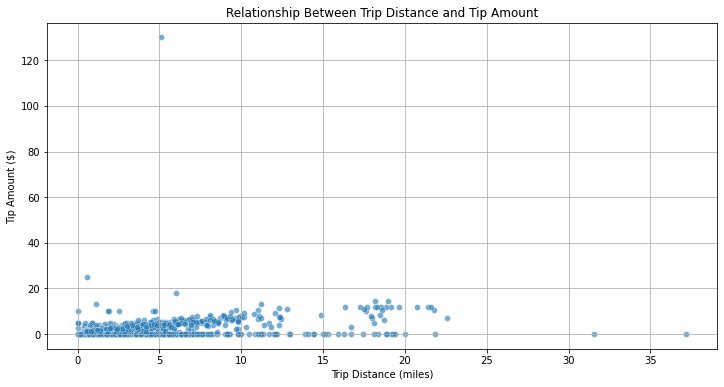

2024-06-05 08:25:40,268 - INFO - Analysis completed successfully.


In [0]:

# 12. Can you identify any patterns in the relationship between trip distance and tip amount?
# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def analyze_trip_distance_vs_tip(result_df):
    try:
        # Ensure the necessary columns exist
        if 'trip_distance' not in result_df.columns or 'tip_amount' not in result_df.columns:
            logging.error("Required columns are not in the DataFrame")
            return None

        # Log the start of the analysis
        logging.info("Starting analysis of trip distance vs tip amount.")

        # Plot the relationship
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='trip_distance', y='tip_amount', data=result_df, alpha=0.6)
        plt.title('Relationship Between Trip Distance and Tip Amount')
        plt.xlabel('Trip Distance (miles)')
        plt.ylabel('Tip Amount ($)')
        plt.grid(True)
        plt.show()

        # Log the completion of the analysis
        logging.info("Analysis completed successfully.")

    except Exception as e:
        logging.error(f"Error in analyzing trip distance vs tip amount: {e}")
        return None


analyze_trip_distance_vs_tip(result_df)

In [0]:

# 13. Is there a correlation between the number of passengers and the fare amount?
# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def analyze_passenger_count_vs_fare(result_df):
    try:
        # Ensure the necessary columns exist
        if 'passenger_count' not in result_df.columns or 'fare_amount' not in result_df.columns:
            logging.error("Required columns are not in the DataFrame")
            return None

        # Log the start of the analysis
        logging.info("Starting analysis of passenger count vs fare amount.")

        # Calculate the correlation
        correlation = result_df['passenger_count'].corr(result_df['fare_amount'])
        logging.info(f"Correlation coefficient: {correlation}")
        
      

        # Log the completion of the analysis
        logging.info("Analysis completed successfully.")

        return correlation

    except Exception as e:
        logging.error(f"Error in analyzing passenger count vs fare amount: {e}")
        return None

analyze_passenger_count_vs_fare(result_df)

2024-06-05 08:25:40,386 - INFO - Starting analysis of passenger count vs fare amount.
2024-06-05 08:25:40,389 - INFO - Correlation coefficient: 0.03143309106947786
2024-06-05 08:25:40,392 - INFO - Analysis completed successfully.


Out[71]: 0.03143309106947786

2024-06-05 08:25:40,486 - INFO - Starting analysis of extra charges distribution.


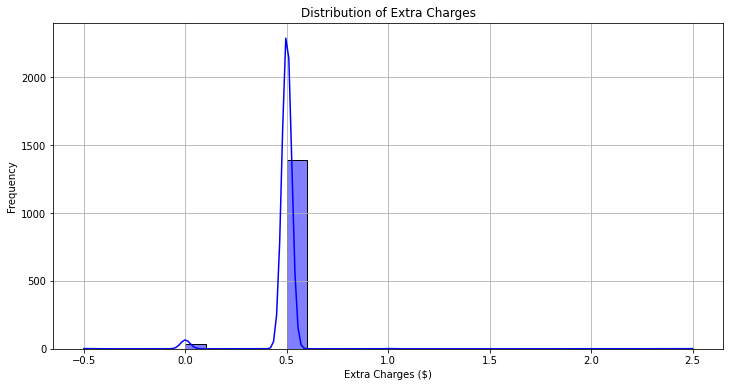

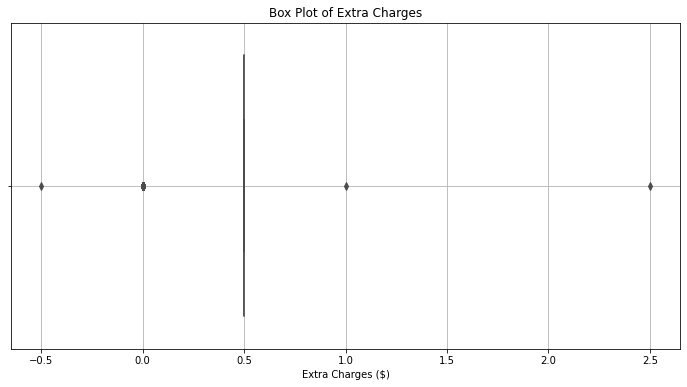

2024-06-05 08:25:41,042 - INFO - Analysis of extra charges distribution completed successfully.


In [0]:
# 14. What is the distribution of extra charges (such as waiting time) across different trips?
# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def analyze_extra_charges_distribution(result_df):
    try:
        # Ensure the necessary columns exist
        if 'extra' not in result_df.columns:
            logging.error("Required column 'extra' is not in the DataFrame")
            return None

        # Log the start of the analysis
        logging.info("Starting analysis of extra charges distribution.")

        # Plot the distribution using a histogram
        plt.figure(figsize=(12, 6))
        sns.histplot(result_df['extra'], bins=30, kde=True, color='blue')
        plt.title('Distribution of Extra Charges')
        plt.xlabel('Extra Charges ($)')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        # Plot the distribution using a box plot
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='extra', data=result_df, color='cyan')
        plt.title('Box Plot of Extra Charges')
        plt.xlabel('Extra Charges ($)')
        plt.grid(True)
        plt.show()

        # Log the completion of the analysis
        logging.info("Analysis of extra charges distribution completed successfully.")

    except Exception as e:
        logging.error(f"Error in analyzing extra charges distribution: {e}")
        return None

analyze_extra_charges_distribution(result_df)


2024-06-05 08:25:41,193 - INFO - Starting analysis of store and forward flag vs trip durations.


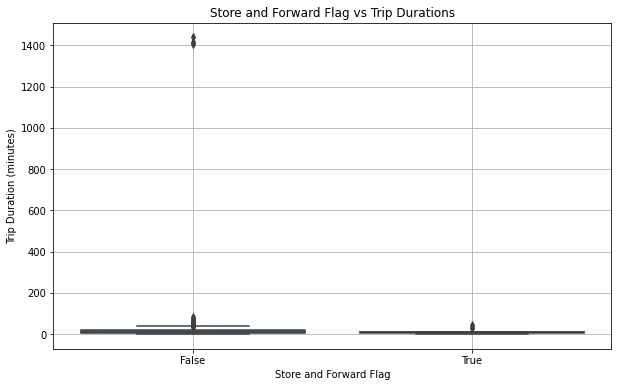

2024-06-05 08:25:41,434 - INFO - Analysis completed successfully.


In [0]:

# 15. How does the store and forward flag affect trip durations?
# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def analyze_store_forward_flag_vs_trip_duration(result_df):
    try:
        # Ensure the necessary columns exist
        if 'tpep_pickup_datetime' not in result_df.columns or 'tpep_dropoff_datetime' not in result_df.columns or 'store_and_fwd_flag' not in result_df.columns:
            logging.error("Required columns are not in the DataFrame")
            return None

        # Log the start of the analysis
        logging.info("Starting analysis of store and forward flag vs trip durations.")

        # Calculate trip durations
        result_df['trip_duration'] = (result_df['tpep_dropoff_datetime'] - result_df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Converting seconds to minutes

        # Plot box plots to compare trip durations
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='store_and_fwd_flag', y='trip_duration', data=result_df)
        plt.title('Store and Forward Flag vs Trip Durations')
        plt.xlabel('Store and Forward Flag')
        plt.ylabel('Trip Duration (minutes)')
        plt.xticks(ticks=[0, 1], labels=['False', 'True'])
        plt.grid(True)
        plt.show()

        # Log the completion of the analysis
        logging.info("Analysis completed successfully.")

    except Exception as e:
        logging.error(f"Error in analyzing store and forward flag vs trip durations: {e}")
        return None

analyze_store_forward_flag_vs_trip_duration(result_df)


2024-06-05 08:25:41,481 - INFO - Starting analysis to identify data anomalies.


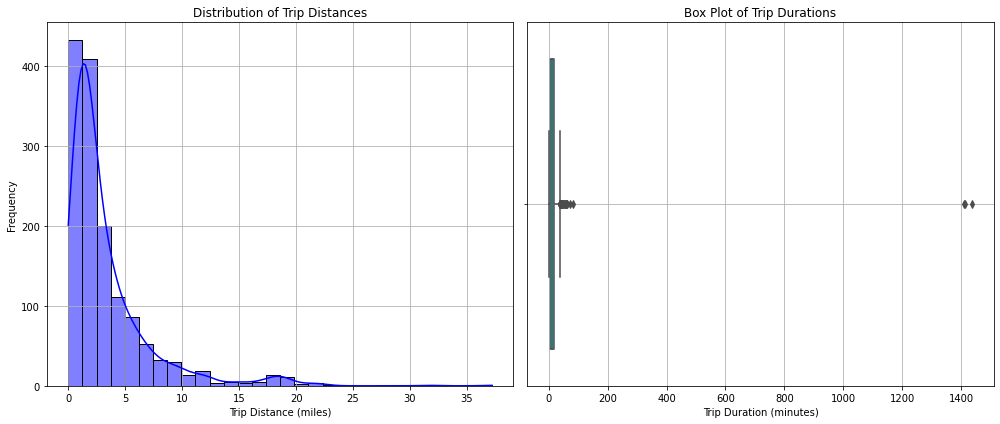

2024-06-05 08:25:42,154 - INFO - Analysis completed successfully.


In [0]:
# 16. Can you identify any anomalies or inconsistencies in the data, such as unrealistic trip distances or durations?
# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def identify_data_anomalies(result_df):
    try:
        # Ensure the necessary columns exist
        if 'trip_distance' not in result_df.columns or 'tpep_pickup_datetime' not in result_df.columns or 'tpep_dropoff_datetime' not in result_df.columns:
            logging.error("Required columns are not in the DataFrame")
            return None

        # Log the start of the analysis
        logging.info("Starting analysis to identify data anomalies.")

        # Calculate trip durations
        result_df['trip_duration'] = (result_df['tpep_dropoff_datetime'] - result_df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Converting seconds to minutes

        # Plot histograms and box plots to identify anomalies
        plt.figure(figsize=(14, 6))

        # Histogram of trip distances
        plt.subplot(1, 2, 1)
        sns.histplot(result_df['trip_distance'], bins=30, kde=True, color='blue')
        plt.title('Distribution of Trip Distances')
        plt.xlabel('Trip Distance (miles)')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Box plot of trip durations
        plt.subplot(1, 2, 2)
        sns.boxplot(x=result_df['trip_duration'], color='cyan')
        plt.title('Box Plot of Trip Durations')
        plt.xlabel('Trip Duration (minutes)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Log the completion of the analysis
        logging.info("Analysis completed successfully.")

    except Exception as e:
        logging.error(f"Error in identifying data anomalies: {e}")
        return None

identify_data_anomalies(result_df)
